(16781312, 21)
(16781312,)
(1000, 8192, 21)
(1000, 8192)


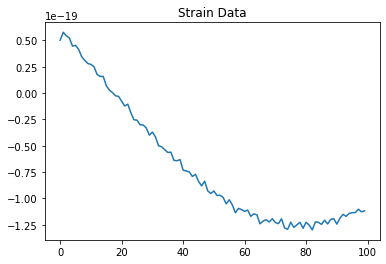

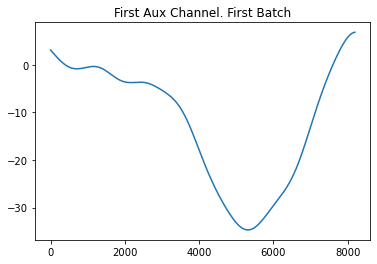

Finding pass-band frequencies via Cross Spectral Density Analysis


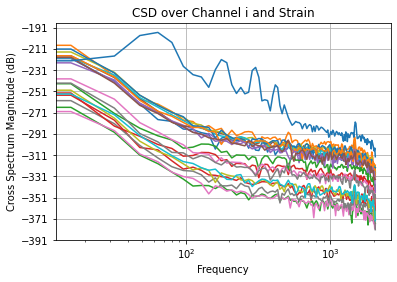

Finding pass-band frequencies via Cross Spectral Density Analysis


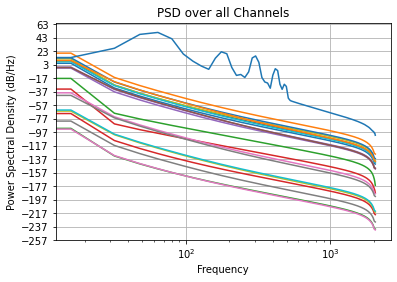

Building Butterworth Filter


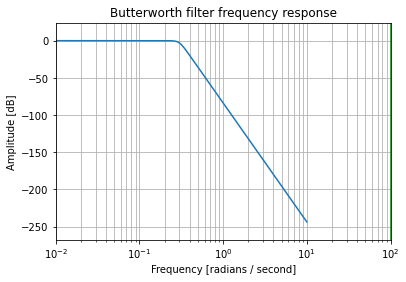

Butterworth filter built
Applying Butterworth to data
(1000, 8192, 21)


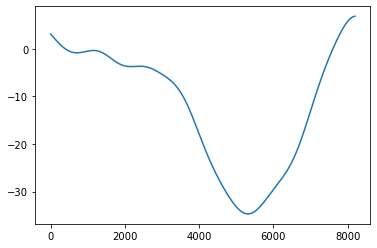

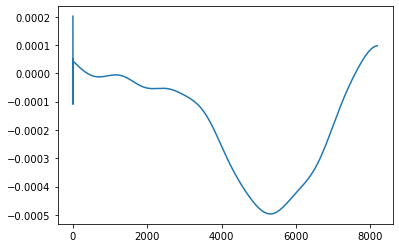

Butterworth filter applied to data
Normalization in progress


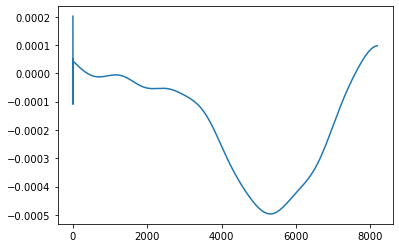

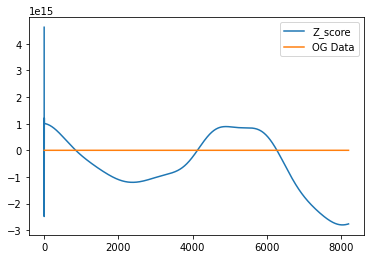

CNN Data Ready, Import witness_data
(1000, 8192, 21)
Normalization Complete
Applying Welch's Method
Welch's Method Complete
(1000, 8192, 21) (1000, 8192, 21) (8192000, 1) (8192000, 1)


In [1]:
#Import data from preprocessing file
from ipynb.fs.full.data_preprocessing_v2 import send_freq_data, send_time_data
import numpy as np

freq_witness, freq_strain_data = send_freq_data()
time_witness, time_strain_data = send_time_data()

print(freq_witness.shape, time_witness.shape, freq_strain_data.shape, time_strain_data.shape)

# Attempt 6: DeepClean As Autoencoder

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Check input shape, given dataset is sampled at 4096Hz
model = keras.models.Sequential(name="attempt_6")
#Convolution Layers
model.add(layers.Conv1D(filters=21, kernel_size=5, strides=1, padding="same", activation="tanh",\
                        input_shape=(time_witness.shape[1], time_witness.shape[2])))
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(filters=8, kernel_size=5, strides=2, padding="same", activation="tanh"))
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(filters=16, kernel_size=5, strides=2, padding="same", activation="tanh"))
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(filters=32, kernel_size=5, strides=2, padding="same", activation="tanh"))
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(filters=64, kernel_size=5, strides=2, padding="same", activation="tanh"))
model.add(layers.BatchNormalization())

#Deconvolution Layers
model.add(layers.Conv1DTranspose(filters=32, kernel_size=5, strides=2, padding="same", activation="tanh"))
model.add(layers.BatchNormalization())
model.add(layers.Conv1DTranspose(filters=16, kernel_size=5, strides=2, padding="same", activation="tanh"))
model.add(layers.BatchNormalization())
model.add(layers.Conv1DTranspose(filters=8, kernel_size=5, strides=2, padding="same", activation="tanh"))
model.add(layers.BatchNormalization())
model.add(layers.Conv1DTranspose(filters=21, kernel_size=5, strides=2, padding="same", activation="tanh"))
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(filters=1, kernel_size=5, padding="same", name = "output"))

model.summary()

#non-trainable parameters come from the BatchNormalization

2023-03-16 00:28:23.239215: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 00:28:24.853292: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/pkgs/cudnn-8.1.0.77-h90431f1_0/lib/:/opt/conda/pkgs/cudatoolkit-11.2.2-he111cf0_8/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-16 00:28:24.853422: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_L

Model: "attempt_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8192, 21)          2226      
                                                                 
 batch_normalization (BatchN  (None, 8192, 21)         84        
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 4096, 8)           848       
                                                                 
 batch_normalization_1 (Batc  (None, 4096, 8)          32        
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 2048, 16)          656       
                                                                 
 batch_normalization_2 (Batc  (None, 2048, 16)         64

In [3]:
import numpy as np

lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=100, decay_rate=0.8)

model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), metrics=["accuracy"])

#Fit DeepClean as an Autoencoder, with no train_test_split
results = model.fit(
    time_witness,
    time_strain_data,
    batch_size=32,
    epochs=10,
    verbose=1,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, verbose=1, min_lr=1e-5),
                keras.callbacks.EarlyStopping(patience=10, verbose=1),
    ],
)

Epoch 1/10
29/29 [==============================] - 21s 553ms/step - loss: 1.5937 - accuracy: 0.0000e+00 - val_loss: 0.1921 - val_accuracy: 0.0000e+00 - lr: 9.3943e-04
Epoch 2/10
29/29 [==============================] - 15s 508ms/step - loss: 1.3290 - accuracy: 0.0000e+00 - val_loss: 0.2175 - val_accuracy: 0.0000e+00 - lr: 8.8056e-04
Epoch 3/10
29/29 [==============================] - 14s 491ms/step - loss: 1.3239 - accuracy: 0.0000e+00 - val_loss: 0.2291 - val_accuracy: 0.0000e+00 - lr: 8.2539e-04
Epoch 4/10
29/29 [==============================] - 16s 543ms/step - loss: 1.3221 - accuracy: 0.0000e+00 - val_loss: 0.2148 - val_accuracy: 0.0000e+00 - lr: 7.7367e-04
Epoch 5/10
29/29 [==============================] - 14s 490ms/step - loss: 1.3210 - accuracy: 0.0000e+00 - val_loss: 0.2109 - val_accuracy: 0.0000e+00 - lr: 7.2519e-04
Epoch 6/10
29/29 [==============================] - ETA: 0s - loss: 1.3208 - accuracy: 0.0000e+00
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003398

In [4]:
#model.predict() with full time_witness dataset
noise_predict = model.predict(time_witness)
print(noise_predict.shape)

32/32 [==============================] - 4s 97ms/step
(1000, 8192, 1)


In [5]:
noise_predict = np.reshape(noise_predict, (8192000,1))

In [6]:
#API Call to send to Postprocessing, WIP
def send_predicted_noise():
    """
    noise_predict = predicted noise from model.predict()
    must be postprocessed before subtracting from 
    time_strain data
    
    time_strain_data = original strain, subtract 
    noise_predict from it once its postprocessed to 
    get clean_data
    """
    return noise_predict, time_strain_data

# WIP

Tasks:

Attempt postprocessing and calculate SNR.

Once that's done and we've analyzed first results, go back and attempt custom loss function.